# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [256]:
# importação dos módulos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [257]:
# abrindo o arquivo e transformando-o em DF

arquivo = pd.read_csv('base_de_dados_dummy.csv')

df = pd.DataFrame(arquivo)

In [258]:
df.dropna(inplace=True)  

In [259]:
df.head(2)

,Unnamed: 0,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,possui_fone_comercial_0,possui_fone_comercial_1,possui_fone_0,possui_fone_1,possui_email_0,possui_email_1,mau_False,mau_True,possui_celular_1
0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1
1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1


In [260]:
quant = df.shape[0]
quant70 = quant * 0.7
quant30 = quant - quant70
verificacao = quant - quant70 - quant30
verificacao
quant70

4739.0

# Separar a variável resposta 'mau' das variáveis explicativas
X = df.loc[0:quant70-1].iloc[:,:13]  # variáveis explicativas
y = df.loc[0:quant70-1].iloc[:,13]  # variável resposta

# Dividir a base em 70% para treinamento e 30% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [261]:
X = df.drop('mau_False', axis=1)  # variáveis explicativas
y = df['mau_False']  # variável resposta

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [262]:
clf = tree.DecisionTreeClassifier(random_state=100)

In [263]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [264]:
plt.figure(figsize=(20, 10))
feature_names = list(X.columns)

<Figure size 2000x1000 with 0 Axes>

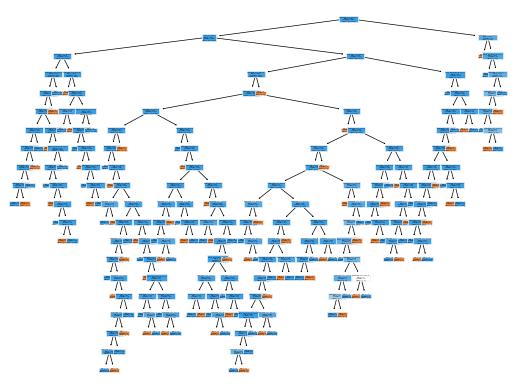

In [265]:
# árvore de decisão
tree.plot_tree(clf, filled=True, feature_names=feature_names)
plt.show()

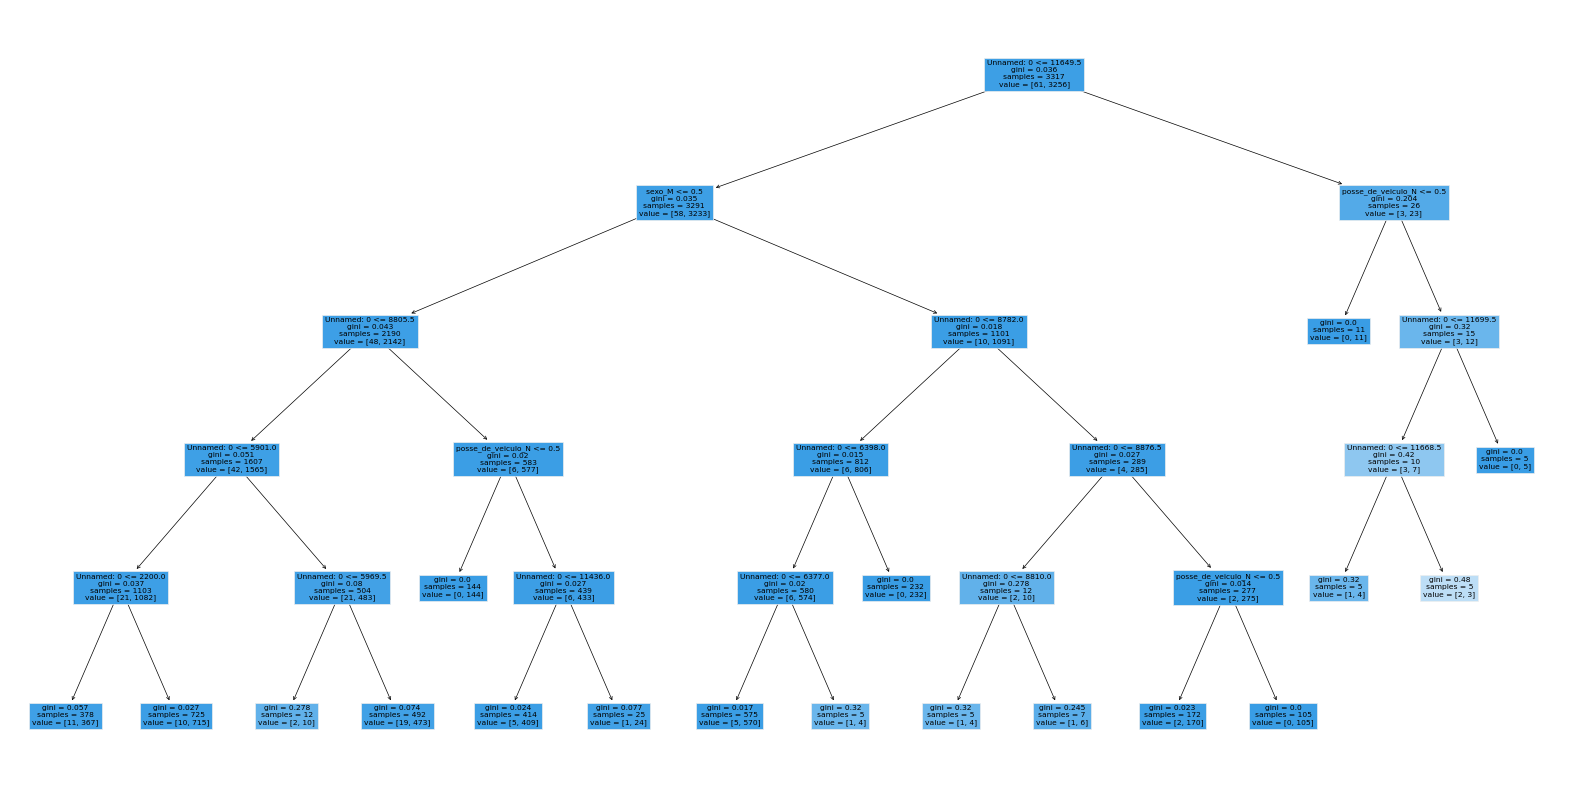

In [266]:
# reduzindo o tamanho
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
feature_names = list(X.columns)
tree.plot_tree(clf, filled=True, feature_names=feature_names)
plt.show()

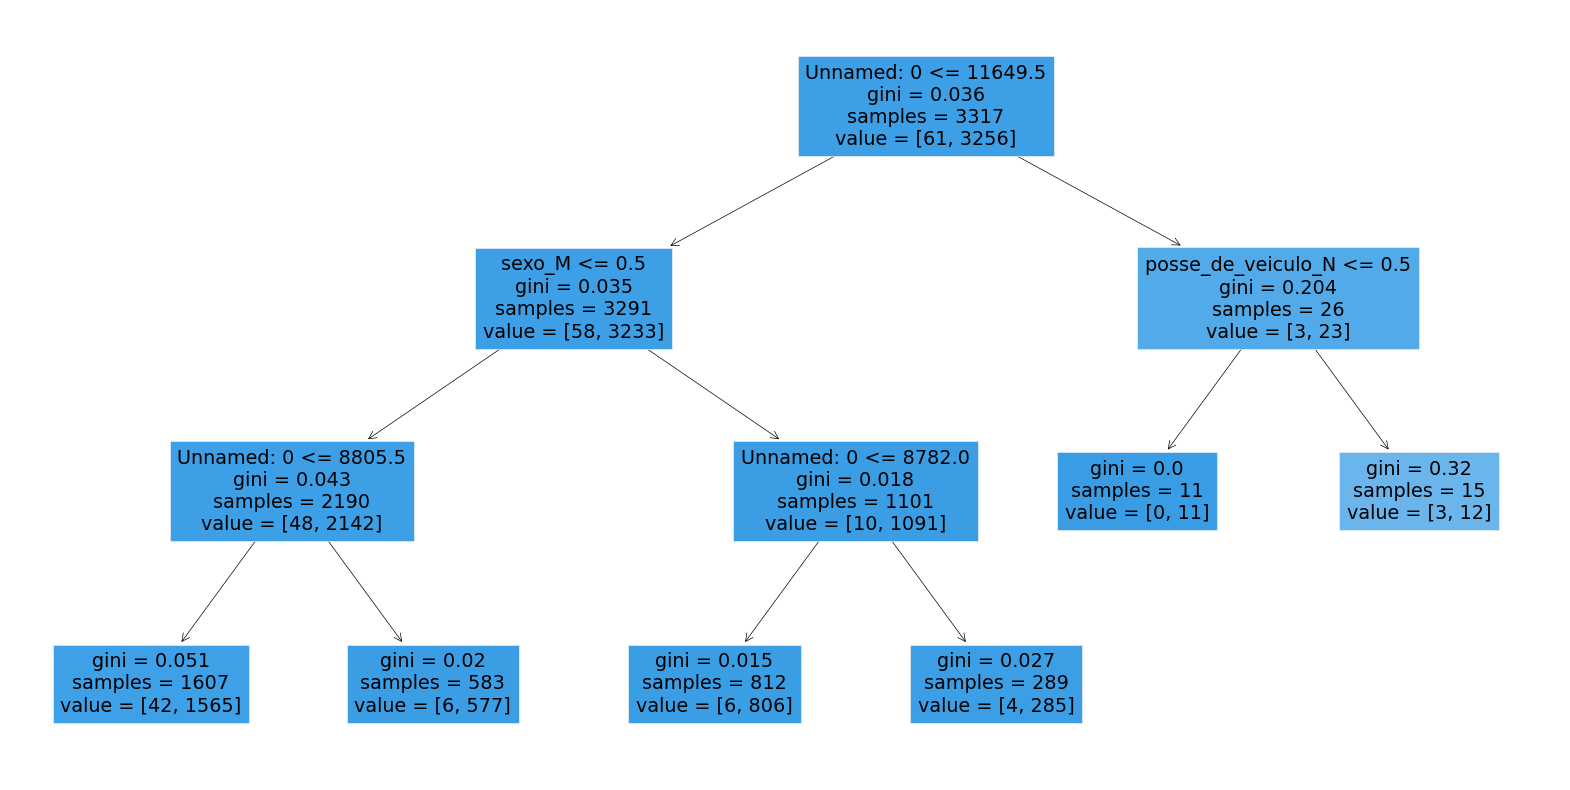

In [267]:
# reduzindo o tamanho
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=10)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
feature_names = list(X.columns)
tree.plot_tree(clf, filled=True, feature_names=feature_names)
plt.show()

In [268]:
# prever os valores usando o modelo treinado
y_pred_train = clf.predict(X_train)

# calcular a acurácia na base de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Acurácia na base de treinamento:", accuracy_train)

Acurácia na base de treinamento: 0.9816098884534218


In [269]:
# calculo da matriz de confusão
cm = confusion_matrix(y_train, y_pred_train)

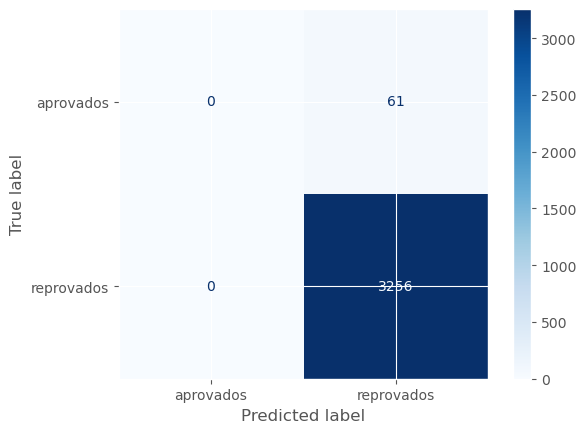

In [270]:
# plotagem da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [271]:
# calculo da acurácia dos dados de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.9816098884534218

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [272]:
# novo classificador de árvore de decisão com parâmetros específicos
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

In [273]:
# novo modelo com os dados de treinamento -treino
clf_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [274]:
# prever os valores usando o novo modelo na base de teste
y_pred_test_new = clf_new.predict(X_train)

In [275]:
# calcular a matriz de confusão para o novo modelo
cm_test_new = confusion_matrix(y_train, y_pred_test_new)

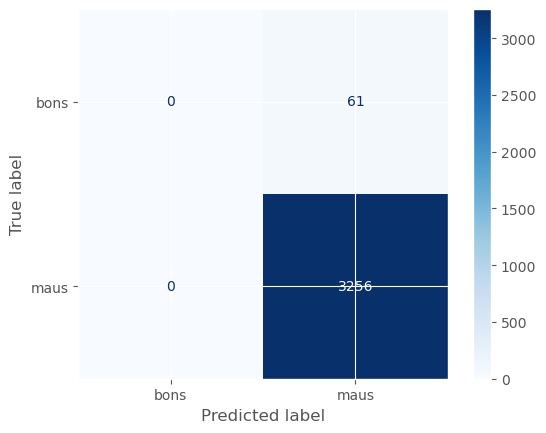

In [276]:
disp_test_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=["bons", "maus"])
disp_test_new.plot(cmap=plt.cm.Blues)
plt.show()

In [277]:
# calcular a acurácia na base de teste para o novo modelo
accuracy_test_new = accuracy_score(y_train, y_pred_test_new)
accuracy_test_new

0.9816098884534218

In [278]:
# calcular a proporção de proponentes classificados como maus
proportion_maus = (y_pred_test_new == 1).mean()
proportion_maus

1.0

In [279]:
# classificar todos os contratos como bons
y_pred_all_bons = [0] * len(y_train)

In [280]:
# acurácia para essa classificação (bons)
accuracy_all_bons = accuracy_score(y_train, y_pred_all_bons)
accuracy_all_bons

0.018390111546578235